In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest as ztest

In [2]:
run = 'u-cd297' #30N
run = 'u-cd354' #30S

# NB, we read in some additional data from longer UKESM simulations here, 
# see ReadMe in /supp_data

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [4]:
### get background
background_dir = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/AERmon/od550aer/gn/latest/'
AOD_background_ds = xr.open_mfdataset(background_dir + '*.nc').sel(time=slice('2035', '2069')).rename({'lat':'latitude', 'lon':'longitude'})

0.13510482341320731 0.13869573175907135
0.12520408466770533 0.12800830602645874


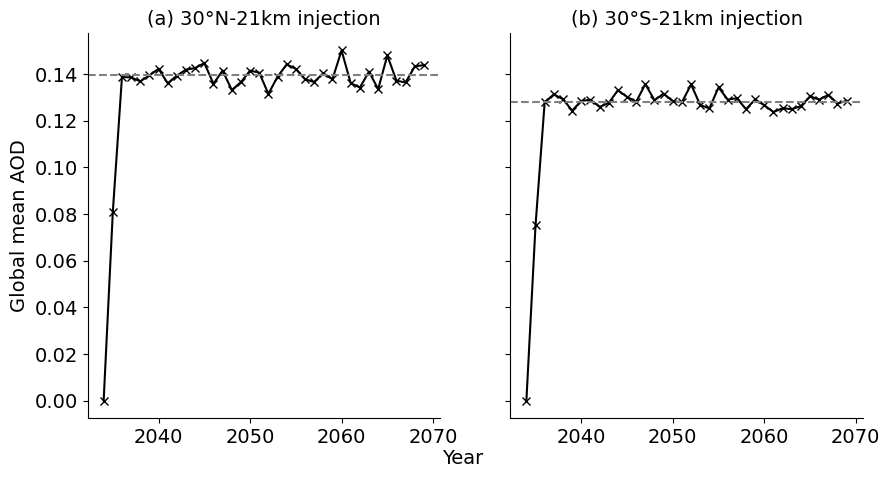

In [5]:
## now plot nicely for 30S and 30N:

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

i = 0
for run in ['u-cd297', 'u-cd354']:
    AOD = xr.open_dataset('supp_data/{}_AOD.nc'.format(run))
    AOD_anom = (AOD['Total_AOD'] - AOD_background_ds['od550aer']).to_dataset(name='AOD550_delta')
    AOD_zonal = AOD_anom.mean(dim='longitude')
    weights = np.cos(np.deg2rad(AOD_zonal['latitude']))
    AOD_ts = AOD_zonal.weighted(weights).mean(dim='latitude')
    AOD_ts = AOD_ts.resample(time='1YE').mean()
    years = np.concatenate(([2034], [x for x in AOD_ts.time.dt.year.values]))
    aods = np.concatenate(([0], [x for x in AOD_ts.AOD550_delta.values]))
    print(np.mean(aods[-20:])-np.std(aods[-20:]), aods[2])

    ax = axs[i]
    ax.plot(years, aods, marker='x', c='black')
    ax.axhline(np.mean(aods[-20:]), c='gray', ls='--')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    
    i=i+1
axs[0].set_title('(a) 30°N-21km injection', fontsize='medium')
axs[1].set_title('(b) 30°S-21km injection', fontsize='medium')
axs[0].set_ylabel('Global mean AOD')
fig.supxlabel('Year', fontsize='medium')
plt.savefig('Figures/Supp/AOD_evolution_longersims.jpg', dpi=350)